In [1]:
!pip install easyocr

     ---------------------------------------- 2.9/2.9 MB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 95.1/95.1 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 35.0/35.0 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 7.6 MB/s eta 0:00:00
     -------------------------------------- 313.0/313.0 kB 3.8 MB/s eta 0:00:00
     -------------------------------------- 172.4/172.4 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.8.0
    Uninstalling torch-1.8.0:
      Successfully uninstalled torch-1.8.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.9.0 requires torch==1.8.0, but you have torch 2.0.1 which is incompatible.


In [2]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from IPython.display import Image
     

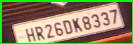

In [3]:
Image("plates/ROI.png")

In [4]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |--------------------------------------------------| 1.7% Complete

Progress: |█-------------------------------------------------| 4.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |███-----------------------------------------------| 7.9% Complete

Progress: |█████████-----------------------------------------| 19.6% Complete

Progress: |██████████████------------------------------------| 29.4% Complete

Progress: |███████████████████-------------------------------| 38.9% Complete

Progress: |███████████████████████---------------------------| 46.7% Complete

Progress: |██████████████████████████------------------------| 53.3% Complete

Progress: |██████████████████████████████--------------------| 60.2% Complete

Progress: |█████████████████████████████████-----------------| 66.9% Complete

Progress: |████████████████████████████████████--------------| 73.9% Complete

Progress: |████████████████████████████████████████----------| 80.8% Complete

Progress: |███████████████████████████████████████████-------| 87.7% Complete

Progress: |███████████████████████████████████████████████---| 95.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [5]:
output = reader.readtext("plates/ROI.png")

In [6]:
output

[([[16.014888429370032, 25.701488842937003],
   [120.72810979624447, 2.7520348804413635],
   [125.98511157062997, 25.298511157062997],
   [21.27189020375554, 48.247965119558636]],
  '~HR26DK8337',
  0.5669244645074634)]

In [7]:
cord = output[-1][0]

In [8]:
cord

[[16.014888429370032, 25.701488842937003],
 [120.72810979624447, 2.7520348804413635],
 [125.98511157062997, 25.298511157062997],
 [21.27189020375554, 48.247965119558636]]

In [9]:
a = list(zip(*cord))
a

[(16.014888429370032,
  120.72810979624447,
  125.98511157062997,
  21.27189020375554),
 (25.701488842937003,
  2.7520348804413635,
  25.298511157062997,
  48.247965119558636)]

In [10]:
min(a[0])

16.014888429370032

In [11]:
min(a[1])

2.7520348804413635

In [12]:
max(a[0])

125.98511157062997

In [13]:
max(a[1])

48.247965119558636

In [14]:
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]

In [15]:
x_min, y_min

(16, 2)

In [16]:
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]


In [17]:
x_max, y_max

(125, 48)

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 30

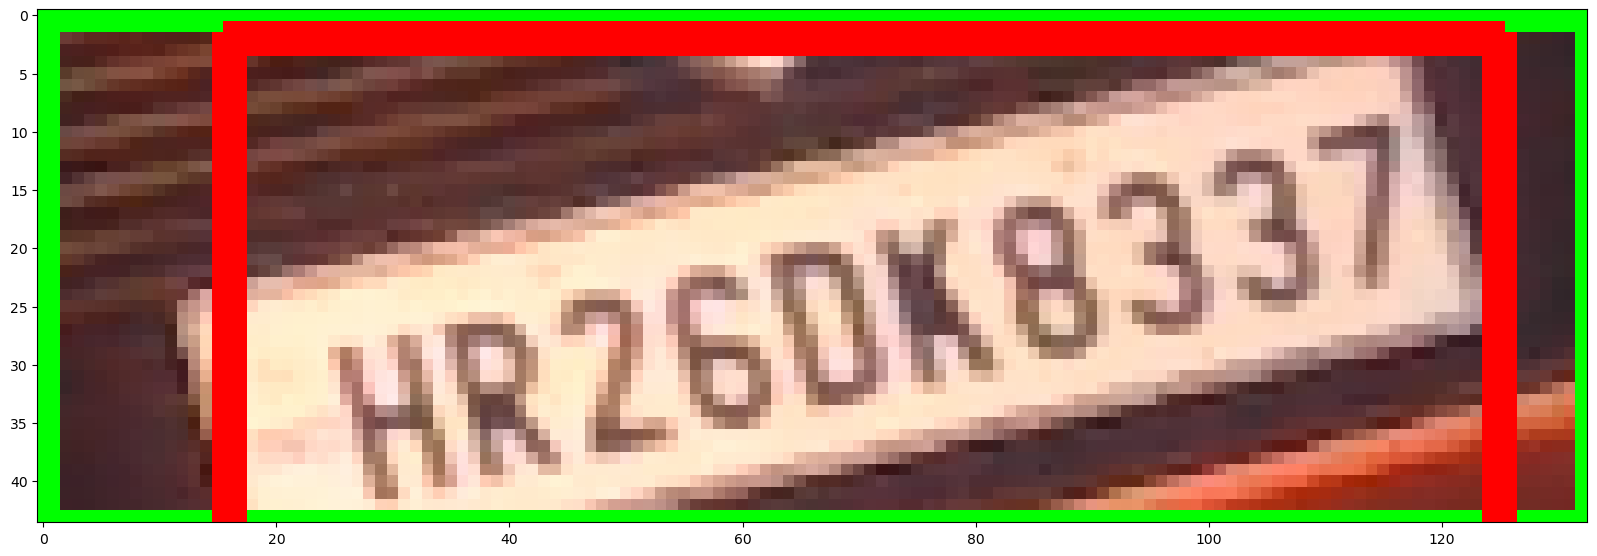

In [20]:
image = cv2.imread('plates/ROI.png')
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))